# 02-1 훈련 세트와 테스트 세트
지도 학습과 비지도 학습의 차이를 배운다. 모델을 훈련시키는 훈련 세트와 모델을 평가하기 위한 테스트 세트로 데이터를 나눠서 학습한다.

## 지도 학습과 비지도 학습
- **지도 학습 알고리즘**은 입력(데이터)과 타깃(정답)으로 이뤄진 훈련 데이터가 필요하다.
- 입력 데이터만 있을 때는 **비지도 학습 알고리즘**을 사용한다.
- **강화 학습 알고리즘**은 타깃이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습된다.

## 훈련 세트와 테스트 세트
- 훈련 세트 : 훈련에 사용되는 데이터
- 테스트 세트 : 평가에 사용하는 데이터

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
[[l, w] for l, w in zip(fish_length, fish_weight)]

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [4]:
print(fish_data[4])

[29.0, 430.0]


In [5]:
# 슬라이싱 연산으로 인덱스 0~34까지 처음 35개 샘플을 훈련 세트로 선택
train_input = fish_data[:35]
train_target = fish_target[:35]

# 슬라이싱 연산으로 인덱스 35~48까지 나머지 14개 샘플을 테스트 세트로 선택
test_input = fish_data[35:]
test_target = fish_target[35:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [7]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
# 이렇게 마지막 14개를 테스트 세트로 떼어 놓으면 훈련 세트에는 빙어가 하나도 들어 있지 않음
# 빙어 없이 모델을 훈련하면 빙어를 올바르게 분류할 수 없음!

0.0

## 샘플링 편향
상식적으로 훈련하는 데이터와 테스트하는 데이터에는 도미와 빙어가 골고루 섞여 있어야 한다. 일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 **샘플링 편향**이라고 부른다.

## 넘파이
파이썬의 대표적인 배열(array) 라이브러리

넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.

In [8]:
import numpy as np

In [9]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [11]:
print(type(input_arr))
print(input_arr.shape) # 이 명령을 사용하면 (샘플 수, 특성 수)를 출력한다.

<class 'numpy.ndarray'>
(49, 2)


In [12]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [13]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [14]:
print(input_arr[[1,3]])
# 넘파이는 슬라이싱 외에 배열 인덱싱 기능 제공
# 배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스를 한 번에 여러 개의 원소를 선택할 수 있음.
# 예를 들면 다음처럼 input_arr에서 두 번째와 네 번째 샘플을 선택하여 출력할 수 있음

[[ 26.3 290. ]
 [ 29.  363. ]]


In [15]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [16]:
print(input_arr[13], train_input[0])
# 만들어진 index의 첫 번째 값은 13이다.
# 따라서 train_input의 첫 번째 원소는 input_arr의 14번째 원소가 들어 있을 것이다.

[ 32. 340.] [ 32. 340.]


In [17]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

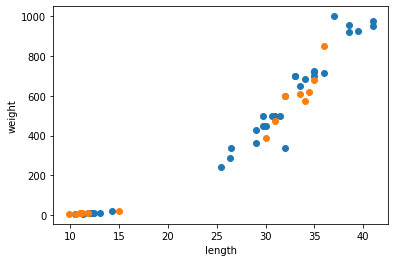

In [18]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램
앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련시켜 보자.

### 학습 및 테스트 하기 (섞어서 분리 데이터 활용)

In [19]:
kn = kn.fit(train_input, train_target)

In [20]:
kn.score(test_input, test_target)

1.0

In [21]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [22]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])